<h1> Food Brand </h1>
<hr>

El objetivo principal es poder dar recomendaciones respecto al desempeño por tipo (Columna G).

<h2> Librerías </h2>
<hr>

Se proceden a cargar las librerías requeridas para el análisis.

In [154]:
import pandas as pd
import numpy as np
import re
import textwrap

import matplotlib.pyplot as plt
import seaborn as sns

<h2> Carga de la información </h2>
<hr>

Ahora se procede la carga de la base de datos.

In [155]:
df = pd.read_excel("Test_Data Analyst.xlsx")

In [156]:
df.dtypes

URL                                 object
Brand Post                          object
Country                             object
Sub Region                          object
Channel                             object
Pillar                              object
Type                                object
Half                                object
Month (F)                           object
Month                               object
Year                                 int64
Date                        datetime64[ns]
Total Reach                         object
Total Impressions CIRCUS           float64
Total Impressions UBER              object
Engagements                        float64
Likes                              float64
Love                               float64
Haha                               float64
Wow                                float64
Angry                              float64
Sad                                float64
Positive Reactions                 float64
Negative Re

In [157]:
df["Channel"] = df["Channel"].apply(lambda x: textwrap.fill(x, 10))
df["Type"] = df["Type"].apply(lambda x: textwrap.fill(x, 10))
df["Country"] = df["Country"].apply(lambda x: textwrap.fill(x, 10))

In [158]:
df["Production Cost"] = df["Production Cost"].apply(lambda x: float(re.sub("\$", "", x)))
df["Total Cost"] = df["Total Cost"].apply(lambda x: (re.sub("\$|\,", "", x))).astype(float)
df["Media Investment"] = df["Media Investment"].apply(lambda x: float(re.sub("\$|\,", "", x)) if not pd.isna(x) else x)
df["Total Reach"] = df["Total Reach"].apply(lambda x: float(re.sub("\,", "", str(x)))).astype(float)
df["Total Impressions UBER"] = df["Total Impressions UBER"].apply(lambda x: float(re.sub("\,", "", str(x)))).astype(float)
df["CPM"] = df["CPM"].apply(lambda x: re.sub("\$|\,", "", str(x)) if not bool(re.match("\#", str(x))) else np.nan).astype(float)

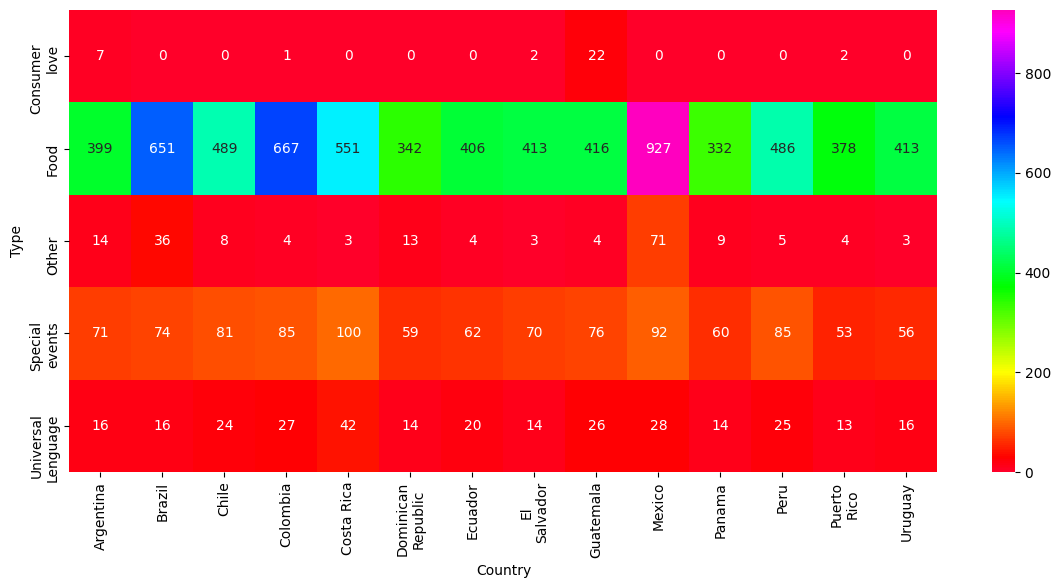

In [171]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6))

sns.heatmap(
    df[["Country", "Type"]].
    value_counts().
    fillna(0).
    reset_index().
    rename({0: "Cantidad"}, axis=1).
    pivot_table(index="Type", columns="Country", values="Cantidad", fill_value = 0),
    annot=True,
    fmt='g',
    cmap="gist_rainbow",
    ax = ax)

plt.show()

<AxesSubplot: xlabel='Type', ylabel='Channel'>

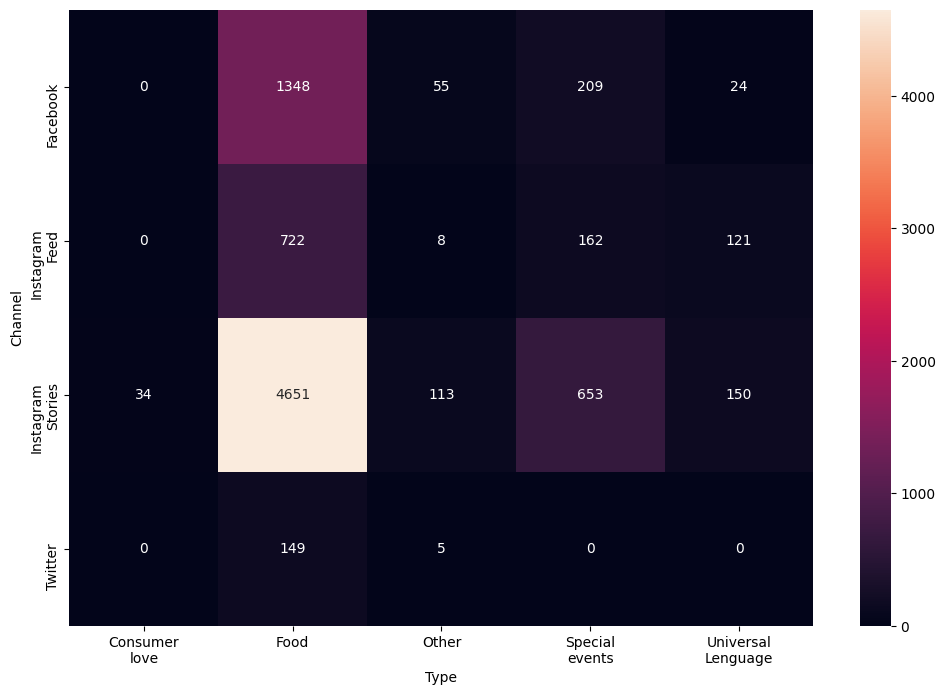

In [166]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

sns.heatmap(
    df[["Channel", "Type"]].
    value_counts().
    fillna(0).
    reset_index().
    rename({0: "Cantidad"}, axis=1).
    pivot_table(index="Channel", columns="Type", values="Cantidad",
          fill_value = 0),
    annot=True,
    fmt='g',
    ax = ax)

In [165]:
(df[["Channel", "Type"]].
    value_counts().
    fillna(0).
    reset_index().
    rename({0: "Cantidad"}, axis=1).
    pivot_table(index="Channel", columns="Type", values="Cantidad",
          fill_value = 0))

Type,Consumer\nlove,Food,Other,Special\nevents,Universal\nLenguage
Channel,,,,,
Facebook,0,1348,55,209,24
Instagram\nFeed,0,722,8,162,121
Instagram\nStories,34,4651,113,653,150
Twitter,0,149,5,0,0
